In this notebook we will use the nn class **Sequential** to model a CNN

We will use the single target network

# Import

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

from sklearn.model_selection import KFold

from tqdm import tqdm

import load_script
from params import *
from custom_layers import *
from training import *
from networks import *

from utilities import *
from parse_dataset import *

In [2]:
%load_ext autoreload
%autoreload 2

# Loading the dataset

In [3]:
folder=Dataset(base_directory='/home/stefano/',dataset='eeg')

Reading data from /home/stefano/EEG//
Reading data from /home/stefano/EEG//stored//
Reading data from /home/stefano/EEG//__pycache__//
Reading data from /home/stefano/EEG//data//
Reading data from /home/stefano/EEG//stefano//
Reading data from /home/stefano/EEG//stefano//figures//
Reading data from /home/stefano/EEG//stefano//__pycache__//
Reading data from /home/stefano/EEG//stefano//notebook//


In [4]:
# train_dataset,train_target=load_script.load_dataset_1000hz(train=True)

In [5]:
# test_dataset,test_target=load_script.load_dataset_1000hz(train=False)

In [6]:
train_dataset,train_target=load_script.load_dataset(train=True)

In [7]:
test_dataset,test_target=load_script.load_dataset(train=False)

# Shuffling training testing

In [8]:
dataset=torch.cat((train_dataset.data,test_dataset.data),0)
target=torch.cat((train_target.data,test_target.data),0)

In [9]:
permutations=torch.randperm(dataset.shape[0])

In [10]:
dataset=dataset[permutations]
target=target[permutations]

In [11]:
train_dataset=Variable(dataset[:316])
train_target=Variable(target[:316])
test_dataset=Variable(dataset[316:])
test_target=Variable(target[316:])

# Normalization

In [12]:
train_dataset.shape

torch.Size([316, 28, 50])

In [13]:
test_dataset.shape

torch.Size([100, 28, 50])

In [14]:
mean=train_dataset.mean(0).mean(1).view(1,28,1)
std=train_dataset.std(2).mean(0).view(1,28,1)

In [15]:
train_dataset=(train_dataset-mean)/std
test_dataset=(test_dataset-mean)/std

# Defining the network

### Simple Network

# Training

0


  3%|▎         | 8/300 [00:00<00:04, 72.57it/s]

FourCNNLayers(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (5): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (6): ReLU()
    (7): Dropout(p=0)
    (8): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (9): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (10): ReLU()
    (11): Dropout(p=0)
    (12): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (13): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (14): ReLU()
    (15): Dropout(p=0)
    (16): Flatten(
    )
    (17): Linear(in_features=1176, out_features=200, bias=True)
    (18): ReLU()
    (19): Linear(in_features=200, out_features=2, bias=True)
  )
)
Repetition 0


100%|██████████| 300/300 [00:05<00:00, 57.92it/s]


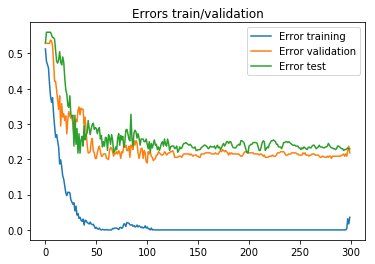

Performance train: 0.00116736990155
Performance validation: 0.213037974684
Performance test: 0.2361
1


  3%|▎         | 8/300 [00:00<00:03, 76.19it/s]

FourCNNLayers(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (5): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (6): ReLU()
    (7): Dropout(p=0)
    (8): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (9): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (10): ReLU()
    (11): Dropout(p=0)
    (12): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (13): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (14): ReLU()
    (15): Dropout(p=0)
    (16): Flatten(
    )
    (17): Linear(in_features=1176, out_features=200, bias=True)
    (18): ReLU()
    (19): Linear(in_features=200, out_features=2, bias=True)
  )
)
Repetition 0


100%|██████████| 300/300 [00:05<00:00, 56.75it/s]


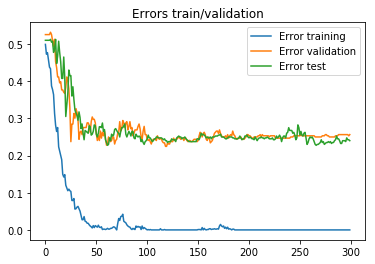

Performance train: 0.0
Performance validation: 0.251814345992
Performance test: 0.245966666667
2


  3%|▎         | 8/300 [00:00<00:03, 75.46it/s]

FourCNNLayers(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (5): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (6): ReLU()
    (7): Dropout(p=0)
    (8): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (9): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (10): ReLU()
    (11): Dropout(p=0)
    (12): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (13): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (14): ReLU()
    (15): Dropout(p=0)
    (16): Flatten(
    )
    (17): Linear(in_features=1176, out_features=200, bias=True)
    (18): ReLU()
    (19): Linear(in_features=200, out_features=2, bias=True)
  )
)
Repetition 0


100%|██████████| 300/300 [00:05<00:00, 54.11it/s]


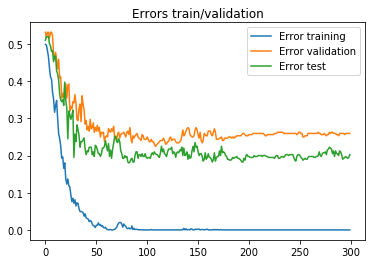

Performance train: 0.0
Performance validation: 0.258902953586
Performance test: 0.200066666667
3


  2%|▏         | 7/300 [00:00<00:04, 69.43it/s]

FourCNNLayers(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (5): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (6): ReLU()
    (7): Dropout(p=0)
    (8): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (9): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (10): ReLU()
    (11): Dropout(p=0)
    (12): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (13): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (14): ReLU()
    (15): Dropout(p=0)
    (16): Flatten(
    )
    (17): Linear(in_features=1176, out_features=200, bias=True)
    (18): ReLU()
    (19): Linear(in_features=200, out_features=2, bias=True)
  )
)
Repetition 0


100%|██████████| 300/300 [00:05<00:00, 56.12it/s]


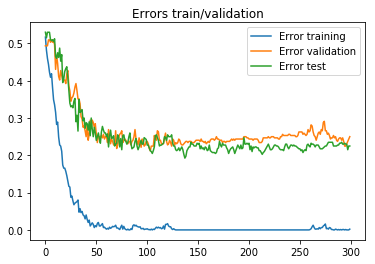

Performance train: 0.00181434599156
Performance validation: 0.253417721519
Performance test: 0.224433333333
4


  2%|▏         | 6/300 [00:00<00:05, 57.63it/s]

FourCNNLayers(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (5): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (6): ReLU()
    (7): Dropout(p=0)
    (8): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (9): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (10): ReLU()
    (11): Dropout(p=0)
    (12): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (13): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (14): ReLU()
    (15): Dropout(p=0)
    (16): Flatten(
    )
    (17): Linear(in_features=1176, out_features=200, bias=True)
    (18): ReLU()
    (19): Linear(in_features=200, out_features=2, bias=True)
  )
)
Repetition 0


100%|██████████| 300/300 [00:05<00:00, 56.48it/s]


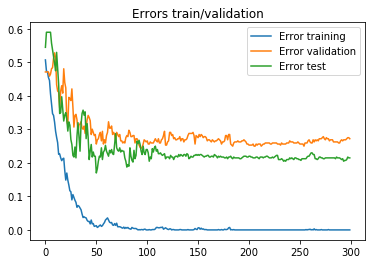

Performance train: 0.000168776371308
Performance validation: 0.263839662447
Performance test: 0.214133333333
5


  3%|▎         | 8/300 [00:00<00:04, 71.99it/s]

FourCNNLayers(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (5): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (6): ReLU()
    (7): Dropout(p=0)
    (8): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (9): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (10): ReLU()
    (11): Dropout(p=0)
    (12): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (13): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (14): ReLU()
    (15): Dropout(p=0)
    (16): Flatten(
    )
    (17): Linear(in_features=1176, out_features=200, bias=True)
    (18): ReLU()
    (19): Linear(in_features=200, out_features=2, bias=True)
  )
)
Repetition 0


100%|██████████| 300/300 [00:06<00:00, 45.71it/s]


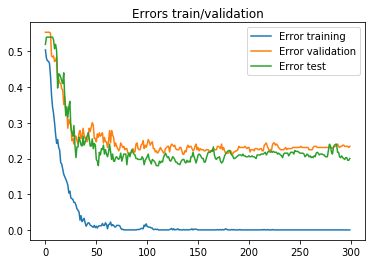

Performance train: 0.0
Performance validation: 0.23135021097
Performance test: 0.212866666667
6


  3%|▎         | 8/300 [00:00<00:04, 71.30it/s]

FourCNNLayers(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (5): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (6): ReLU()
    (7): Dropout(p=0)
    (8): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (9): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (10): ReLU()
    (11): Dropout(p=0)
    (12): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (13): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (14): ReLU()
    (15): Dropout(p=0)
    (16): Flatten(
    )
    (17): Linear(in_features=1176, out_features=200, bias=True)
    (18): ReLU()
    (19): Linear(in_features=200, out_features=2, bias=True)
  )
)
Repetition 0


100%|██████████| 300/300 [00:06<00:00, 46.67it/s]


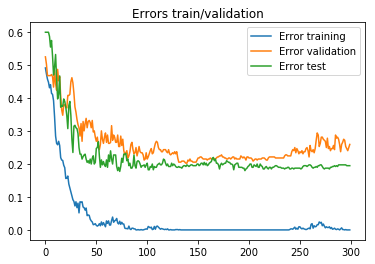

Performance train: 0.00514767932489
Performance validation: 0.24641350211
Performance test: 0.1914
7


  3%|▎         | 8/300 [00:00<00:03, 75.18it/s]

FourCNNLayers(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (5): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (6): ReLU()
    (7): Dropout(p=0)
    (8): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (9): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (10): ReLU()
    (11): Dropout(p=0)
    (12): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (13): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (14): ReLU()
    (15): Dropout(p=0)
    (16): Flatten(
    )
    (17): Linear(in_features=1176, out_features=200, bias=True)
    (18): ReLU()
    (19): Linear(in_features=200, out_features=2, bias=True)
  )
)
Repetition 0


100%|██████████| 300/300 [00:05<00:00, 56.93it/s]


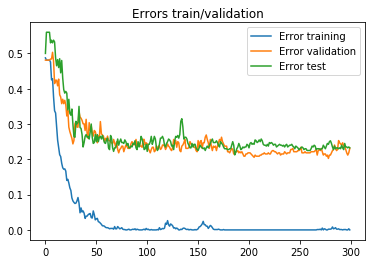

Performance train: 0.000857946554149
Performance validation: 0.222827004219
Performance test: 0.235033333333
8


  3%|▎         | 8/300 [00:00<00:04, 72.65it/s]

FourCNNLayers(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (5): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (6): ReLU()
    (7): Dropout(p=0)
    (8): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (9): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (10): ReLU()
    (11): Dropout(p=0)
    (12): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (13): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (14): ReLU()
    (15): Dropout(p=0)
    (16): Flatten(
    )
    (17): Linear(in_features=1176, out_features=200, bias=True)
    (18): ReLU()
    (19): Linear(in_features=200, out_features=2, bias=True)
  )
)
Repetition 0


 14%|█▍        | 42/300 [00:00<00:04, 55.38it/s]

In [ ]:
results=[]
for i in range(50):
    print(i)
    train_dataset,train_target=load_script.load_dataset(train=True)
    test_dataset,test_target=load_script.load_dataset(train=False)
    
    dataset=torch.cat((train_dataset.data,test_dataset.data),0)
    target=torch.cat((train_target.data,test_target.data),0)
    permutations=torch.randperm(dataset.shape[0])
    dataset=dataset[permutations]
    target=target[permutations]
    train_dataset=Variable(dataset[:316])
    train_target=Variable(target[:316])
    test_dataset=Variable(dataset[316:])
    test_target=Variable(target[316:])
    mean=train_dataset.mean(0).mean(1).view(1,28,1)
    std=train_dataset.std(2).mean(0).view(1,28,1)
    train_dataset=(train_dataset-mean)/std
    test_dataset=(test_dataset-mean)/std
    
    cv=CrossValidation(k=4,train_dataset=train_dataset,test_dataset=test_dataset,
                   train_target=train_target,test_target=test_target,cuda=True)

    net_type=FourCNNLayers
    optimizer_type=optim.Adam
    criterion_type=nn.CrossEntropyLoss
    network_params=NetworkParams(conv_filters=[28,28,28],conv_kernels=[3,3,3],
                                 linear_filters=[200,2],
                                 dropout_rate=0,batch_norm=True,conv1D=True)
    optimizer_params=OptimizerParams()
    train_params=TrainParams(max_epoch=300,mini_batch_size=79)


    params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
                  optimizer_params=optimizer_params,train_params=train_params,cuda=True)

    cv(params,repetitions=1,cross_validation=True,repetitions_test=4)
    results.append(cv.result)

In [ ]:
params.network

In [ ]:
validation=[]
test=[]
for result in results:
    for experiment in result._experiments:
        validation.append(experiment._performance_validation)
        test.append(experiment._performance_test)

In [ ]:
np.mean(validation)

In [ ]:
np.mean(test)

In [ ]:
save=True
if save:
    file_name=folder.stored+'shuffle'
    write_pickle(results,file_name)

In [ ]:
cv=CrossValidation(k=2,train_dataset=train_dataset,test_dataset=test_dataset,
                   train_target=train_target,test_target=test_target)

net_type=ThreeLayers2D
optimizer_type=optim.Adam
criterion_type=nn.CrossEntropyLoss
network_params=NetworkParams(conv_filters=[28,28,28],conv_kernels=[(3,1),(5,3),(3,3)],
                             linear_filters=[200,2],
                             dropout_rate=0,batch_norm=False,conv1D=False)
optimizer_params=OptimizerParams()
train_params=TrainParams(max_epoch=100,mini_batch_size=79)


params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
              optimizer_params=optimizer_params,train_params=train_params,)

cv(params)

In [ ]:
net_type=ThreeLayers
optimizer_type=optim.Adam
criterion_type=nn.CrossEntropyLoss
network_params=NetworkParams(linear_filters=[200,2],dropout_rate=0)
optimizer_params=OptimizerParams()
train_params=TrainParams(max_epoch=100)


params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
              optimizer_params=optimizer_params,train_params=train_params,)

train=Train(train_dataset=train_dataset,test_dataset=test_dataset,
            train_target=train_target,test_target=test_target)
train(params)